In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
import numpy as np
import statistics
import itertools
import env

In [ ]:
# Has the network latency gone up since we switched internet service providers?

H_0: = The network latency has not changed since we switched internet service providers

Hα = The network latency has increased since we switched internet service providers


True Positive = determine the network latency has increased and it has

True Negative = determine the network latency has stayed the same or decreased and it has


Type I error = determine the network latency has increased when it actually stayed the same or decreased

Type II error = determine the network latency has decreaded or stayed the same when it actually hass increased


In [ ]:
# Is the website redesign any good?

H_0 = There is no change in daily website visits or visits have decreased since the redesign

Hα = There has been an increase in website visits since redesign


True Positive = detemine the number of daily visits has increased and it has

True Negative = determine the number of daily visits has stayed the same or decreased and it has


Type I error = determine the number of daily visits has increased when it has actually stayed the same or decrease

Type II error = detremine the number of daily visits has stayed the same or decreased when it actually increased

In [ ]:
# Is our television ad driving more sales?

H_0 = Sales are not greater with new ad

Hα = Sales are greater with new ad


True Positive = determine the sales have increased and they have

True Negative = determine the sales have decreaed or stayed the same and they have


Type I error = detrmine the sales have increased when they decreased or remained the same

Type II error = determine the sales have remained the same or decreased when they have actually increased

In [ ]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

 H_0: The average time it takes to sell home at office #1 is the same as (==) office #2
 Hα: The average time it takes to sell home at office #1 is not the same (!=) office #2

In [5]:
α = 0.05

In [6]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [7]:
if p < α:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis.


In [9]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [20]:
mpg.manufacturer.unique()


array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [ ]:
# Load the mpg dataset and use it to answer the following questions:

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [ ]:
# H_0: There is no fuel-efficiency difference between 2008 and 1999 cars
# Hα: There is a difference in fuel-efficiency between 2008 and 1999 cars

In [23]:
α = 0.05
mpg['avg_eff'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [24]:
fe_2008 = mpg[mpg.year == 2008].avg_eff
fe_1999 = mpg[mpg.year == 1999].avg_eff

In [25]:
fe_2008.count() # big enough sample size

117

In [26]:
fe_1999.count()

117

In [27]:
fe_2008.var() # close enough variance

22.550836772260343

In [28]:
fe_1999.var()

25.850396545865912

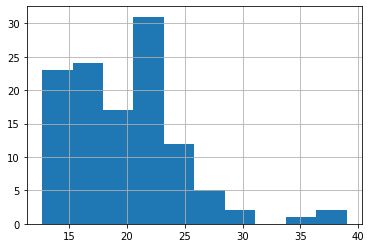

In [33]:
fe_1999.hist()
plt.show()

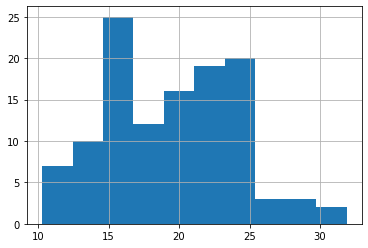

In [34]:
fe_2008.hist()
plt.show()

In [71]:
#H_0
#Hα
stats.levene(fe_1999, fe_2008)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [69]:
t, p = stats.ttest_ind(fe_1999, fe_2008)
t, p

(0.3011962975077886, 0.7635345888327115)

In [31]:
if p < α and t > 0:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Fail to Reject Null Hypothesis


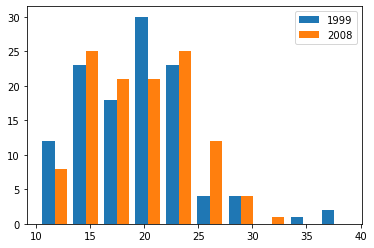

In [64]:
plt.hist([fe_1999, fe_2008], label=['1999', '2008'])
plt.legend(loc="upper right")
plt.show()

In [32]:
fe_1999.mean(), fe_2008.mean()

(19.68238764869729, 19.488662986569054)

In [ ]:
# Are compact cars more fuel-efficient than the average car?

In [ ]:
# H_0: Compact cars are equal(=) or less (<) fuel-efficient than average cars.
# Hα: Compact cars are more (>) fuel-efficient than average cars

In [40]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_eff
pop_mean = mpg.avg_eff.mean()
α = 0.05

In [41]:
pop_mean

19.585525317633177

In [43]:
fe_compact.mean()

23.500416808701296

In [44]:
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [45]:
if (p/2 < α) and t > 0:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


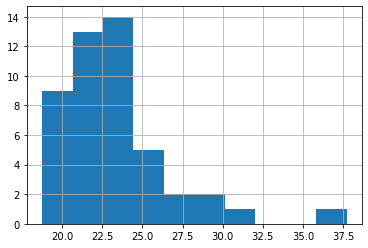

In [46]:
fe_compact.hist()
plt.show()

In [ ]:
# Do manual cars get better gas mileage than automatic cars?

In [ ]:
# H_0: There is no difference in gas mileage between manual and automatic cars(!=)
# Hα: Manual cars get better mileage than automatic cars(==)
    
α = 0.05

In [47]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [48]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [50]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_eff
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_eff

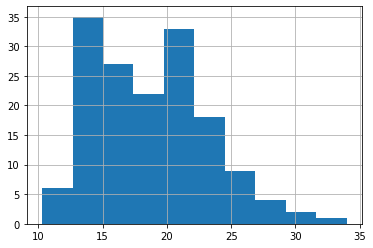

In [51]:
fe_auto.hist()
plt.show()

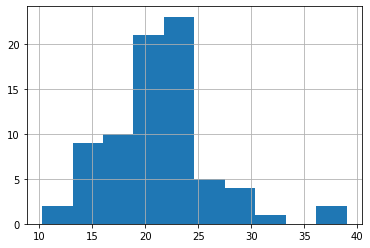

In [52]:
fe_manual.hist()
plt.show()

In [53]:
fe_auto.var() # similar variance

20.428279095002054

In [54]:
fe_manual.var() # similar variance

25.665633639828275

In [72]:
#H_0: variance is different 
#Hα: variance is the same
stats.levene(fe_auto, fe_manual)

if p < α:
    print('Reject the Null')
else:
    print('Fail to Reject')

Fail to Reject


In [56]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [57]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=False)
t, p/2

(4.47444321386703, 7.99035135103976e-06)

In [58]:
if (p/2 < α) and t > 0:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Reject the Null Hypothesis


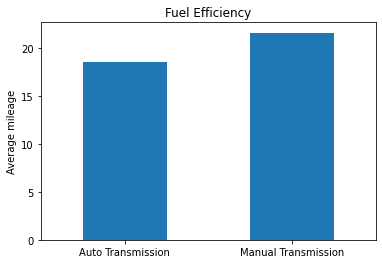

In [63]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')
mpg.groupby('transmission_type').avg_eff.mean().plot.bar()
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Average mileage')
plt.title('Fuel Efficiency')
plt.show()

In [ ]:
# Use the telco_churn data. Does tenure correlate with monthly charges? 


In [110]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
query = '''
        SELECT *
        FROM customers
        JOIN internet_service_types 
        USING (internet_service_type_id)
'''
df = pd.read_sql(query, url)
df.head()

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.9,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,Fiber optic


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   customer_id               7043 non-null   object 
 2   gender                    7043 non-null   object 
 3   senior_citizen            7043 non-null   int64  
 4   partner                   7043 non-null   object 
 5   dependents                7043 non-null   object 
 6   tenure                    7043 non-null   int64  
 7   phone_service             7043 non-null   object 
 8   multiple_lines            7043 non-null   object 
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [112]:
df.columns

Index(['internet_service_type_id', 'customer_id', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type'],
      dtype='object')

In [96]:
df.shape

(7043, 2)

In [114]:
df = df[['tenure', 'monthly_charges', 'total_charges','internet_service_type', 'phone_service']]
df

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
0,9,65.60,593.3,DSL,Yes
1,9,59.90,542.4,DSL,Yes
2,4,73.90,280.85,Fiber optic,Yes
3,13,98.00,1237.85,Fiber optic,Yes
4,3,83.90,267.4,Fiber optic,Yes
...,...,...,...,...,...
7038,13,55.15,742.9,DSL,Yes
7039,22,85.10,1873.7,Fiber optic,Yes
7040,2,50.30,92.75,DSL,Yes
7041,67,67.85,4627.65,DSL,Yes


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

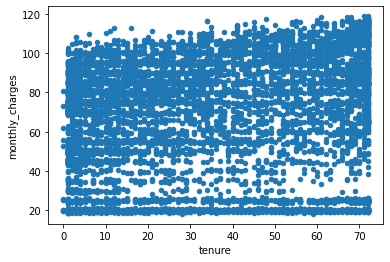

In [81]:
df.plot.scatter(x='tenure', y='monthly_charges')

In [ ]:
# H_0: There is no linear correlation between tenure and monthly_charges
# Hα: There is a linear correlation between tenure and monthly_charges

In [83]:
α = 0.05
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.24789985628615008, 4.0940449915016345e-99)

In [84]:
if p < α:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject')

Reject the Null Hypothesis


In [ ]:
# Even though there is a correlation, its relatively small(0.25)

In [115]:
df.sort_values(by='total_charges').head()

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
2855,0,73.35,,DSL,Yes
3118,0,52.55,,DSL,No
3052,0,25.75,,None,Yes
5433,0,19.85,,None,Yes
1731,0,20.00,,None,Yes


In [ ]:
# Total charges? 


In [ ]:
# H_0: There is no linear correlation between tenure and total_charges
# Hα: There is a linear correlation between tenure and total_charges

In [170]:
df.sort_values(by='total_charges').head()


,tenure,monthly_charges,total_charges,internet_service_type,phone_service
2060,1,18.80,18.80,None,Yes
6350,1,18.85,18.85,None,Yes
6560,1,18.85,18.85,None,Yes
7033,1,18.90,18.90,None,Yes
981,1,19.00,19.00,None,Yes


In [160]:
df = df.dropna()

In [161]:
df.shape

(7032, 5)

In [157]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)

In [159]:
df.shape

(7043, 5)

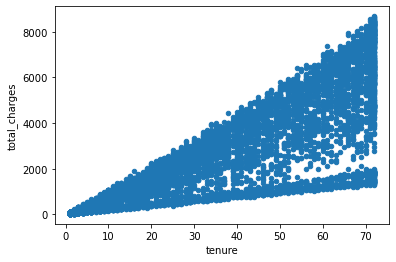

In [162]:
df.plot.scatter(y='total_charges', x='tenure')
plt.show()

In [171]:
r, p = stats.pearsonr(df.tenure, df.total_charges)
if p < α:
    print('Reject Null')
else:
    print('Fail to Reject')
r, p

Reject Null


(0.825880460933202, 0.0)

In [ ]:
# There is a strong correlation between tenure and total_charges (0.82)

In [ ]:
# What happens if you control for phone and internet service?

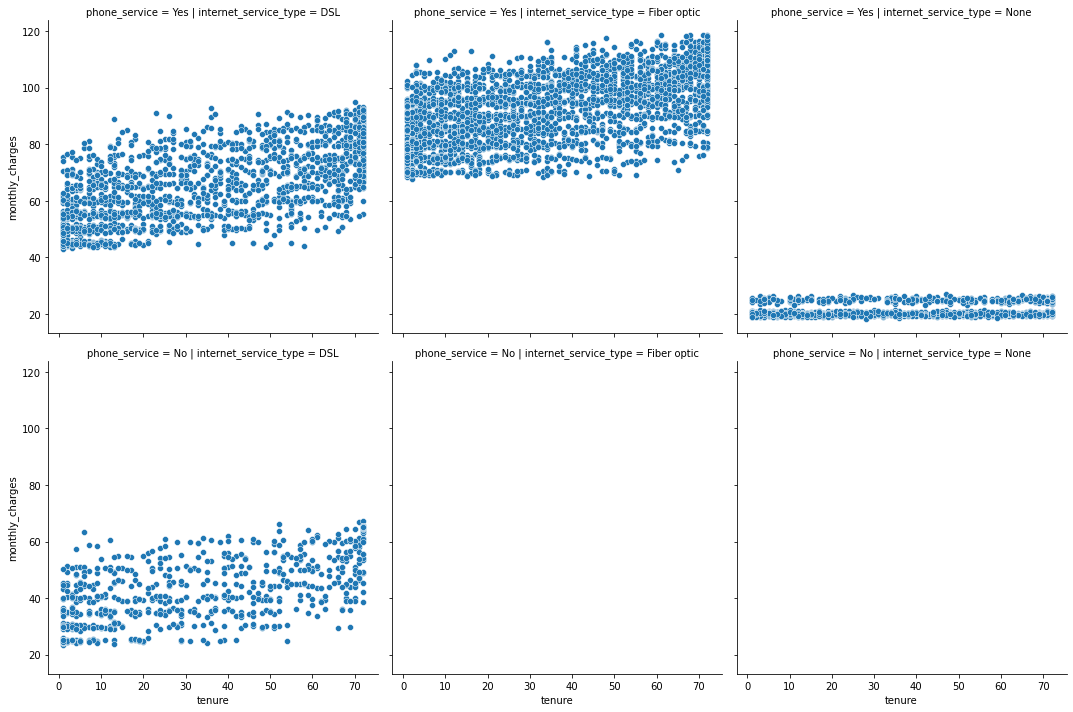

In [173]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col='internet_service_type', row='phone_service')
plt.show()

In [ ]:
def tenure_and_monthly(df):
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index = ['r', 'p'])

In [ ]:
df.groupby(['internet_service_type', 'phone_service']).apply(tenure_and_monthly)

In [ ]:
# there is a stronger correlation between tenure and monthly charges

In [183]:
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
r, p

(0.2468617666408935, 3.9898213232673846e-98)

In [180]:
def tenure_and_total(df):
    return pd.Series(stats.pearsonr(df.tenure, df.total_charges), index = ['r', 'p'])

In [181]:
df.groupby(['internet_service_type', 'phone_service']).apply(tenure_and_total)

r    p
internet_service_type phone_service               
DSL                   No             0.953423  0.0
                      Yes            0.970533  0.0
Fiber optic           Yes            0.985309  0.0
None                  Yes            0.981465  0.0

In [182]:
# compare with the total_charges correlation 
r, p = stats.pearsonr(df.tenure, df.total_charges)
r, p

(0.825880460933202, 0.0)

In [ ]:
# There is even more stronger correlation when we control for services

In [ ]:
# Use the employees database.
# Is there a relationship between how long an employee has been with the company and their salary?


In [147]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
        SELECT
        DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
        s.salary AS salary
        FROM employees e
        JOIN salaries s 
        USING (emp_no)
        WHERE s.to_date > NOW()
'''

In [148]:
df2 = pd.read_sql(query, url)
df2.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


In [ ]:
# H_0: There is no linear relationship between employee tenure and their salary

# Hα : There is a linear relationship between employee tenure and their salary

In [124]:
r, p = stats.pearsonr(df2.tenure, df2.salary)
r, p 

(0.3064625613186078, 0.0)

In [184]:
if p < α:
    print('Reject Null')
else:
    print('Fail to Reject')

Reject Null


In [ ]:
# We can reject the null hypothesis but the correlation is small(0.30)

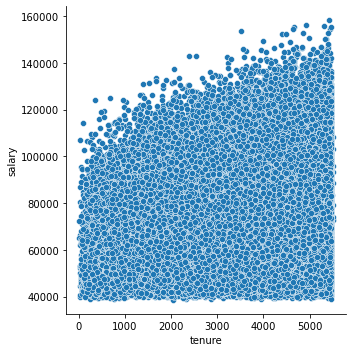

In [125]:
sns.relplot(data=df2, y='salary', x='tenure')

In [ ]:
# Is there a relationship between how long an employee has been with the company and
# the number of titles they have had?

In [139]:
query = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
    FROM employees e
    JOIN (
            SELECT emp_no, COUNT(*) as n_titles
            FROM employees e
            JOIN titles t USING (emp_no)
            GROUP BY emp_no
        ) emp_title_count 
        USING (emp_no)
'''
emp_tenure = pd.read_sql(query, url)
emp_tenure.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [140]:
emp_tenure.shape

(300024, 3)

In [141]:
emp_tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   emp_no    300024 non-null  int64
 1   tenure    300024 non-null  int64
 2   n_titles  300024 non-null  int64
dtypes: int64(3)
memory usage: 6.9 MB


In [ ]:
# H_0: There's no linear relationship between employee tenure and number of titles

# Hα: There's a linear relationship between employee tenure and number of titles

In [149]:
r, p = stats.pearsonr(emp_tenure.tenure, emp_tenure.n_titles)
r, p 

(0.26659892991366185, 0.0)

In [150]:
if p < α:
    print('Reject Null')
else:
    print('Fail to Reject')

Reject Null


In [ ]:
# There is a correlation between tenure and the number of titles held by employees.

In [ ]:
# Use the sleepstudy data. 
# Is there a relationship between days and reaction time?

In [131]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [132]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [ ]:
# H_0: There is no linear relationship between days and reaction time
# Hα: There is a linear relationship between days and reaction time


In [137]:
r, p = stats.pearsonr(sleep.Reaction, sleep.Days)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [ ]:
# There is a correlation of 0.535 between Reaction time and Days

In [134]:
if p < α:
    print('Reject Null')
else:
    print('Fail to Reject')

Reject Null


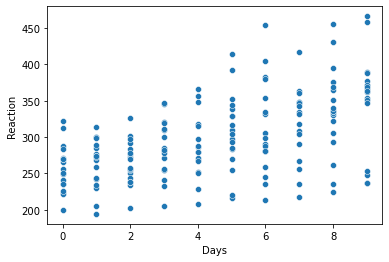

In [136]:
sns.scatterplot(data=sleep, x='Days', y='Reaction')
plt.show()

In [ ]:
# Use the following contingency table to help answer the question of whether using a macbook
# and being a codeup student are independent of each other

# H_0: Being a codeup student has no realtionship with owning a laptop
# Hα: There is a relationship between owning a laptop and being a codeup student

In [226]:
α = 0.05

index = ["Uses_macbook", "Doesn't_macbook"]
columns = ["Codeup_student", "Not_codeup_student"]

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup_student,Not_codeup_student
Uses_macbook,49,20
Doesn't_macbook,1,30


In [186]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [187]:
if p < α:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject the null")

Reject Null Hypothesis


In [ ]:
# Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. 
# Be sure to state your null and alternative hypotheses.

In [189]:
df = data('mpg')
α = 0.05

# Rename "class" since it's a reserved word
df = df.rename(columns={'class': 'vehicle_type'})

# Specify automatic as a boolean
df['is_automatic'] = df.trans.str.startswith('a')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,vehicle_type,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True


In [192]:
category_columns = ["manufacturer", "model", "drv", "fl", "vehicle_type", "is_automatic"]
category_columns


['manufacturer', 'model', 'drv', 'fl', 'vehicle_type', 'is_automatic']

In [194]:
combos = list(itertools.combinations(category_columns, 2))
combos

[('manufacturer', 'model'),
 ('manufacturer', 'drv'),
 ('manufacturer', 'fl'),
 ('manufacturer', 'vehicle_type'),
 ('manufacturer', 'is_automatic'),
 ('model', 'drv'),
 ('model', 'fl'),
 ('model', 'vehicle_type'),
 ('model', 'is_automatic'),
 ('drv', 'fl'),
 ('drv', 'vehicle_type'),
 ('drv', 'is_automatic'),
 ('fl', 'vehicle_type'),
 ('fl', 'is_automatic'),
 ('vehicle_type', 'is_automatic')]

In [196]:
outcomes = []
for combination in combos:
    outcome = {}
    outcome["column1"] = combination[0]
    outcome["column2"] = combination[1]

    observed = pd.crosstab(df[combination[0]], df[combination[1]])
    
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    outcome["p"] = p
    
    if p < α:
        outcome["reject_null"] = True
    else:
        outcome["reject_null"] = False
    
    outcomes.append(outcome)

    
pd.DataFrame(outcomes)

,column1,column2,p,reject_null
0,manufacturer,model,0.000000e+00,True
1,manufacturer,drv,5.128094e-34,True
2,manufacturer,fl,1.062455e-13,True
3,manufacturer,vehicle_type,5.267718e-54,True
4,manufacturer,is_automatic,9.534443e-03,True
5,model,drv,1.473953e-58,True
6,model,fl,1.854690e-07,True
7,model,vehicle_type,9.146376e-164,True
8,model,is_automatic,5.171909e-02,False
9,drv,fl,5.845580e-01,False


In [ ]:
# Use the data from the employees database to answer these questions:

# Is an employee's gender independent of whether an employee works in sales or marketing?
# (only look at current employees)

# H_0: Gender and whether one works at sales or marketing are not related
# Hα: Gender is related to working at sales or marketing

In [198]:

query = '''select gender, dept_name
            from employees
            join dept_emp
            using (emp_no)
            join departments
            using (dept_no)
            where to_date > now()
            and dept_name in('Sales', 'Marketing')'''

emp_df = pd.read_sql(query, url)
emp_df.head()

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


In [199]:
n = emp_df.shape[0]

In [200]:
n

52543

In [201]:
gender_proportions = emp_df.gender.value_counts() / n
gender_proportions

M    0.602935
F    0.397065
Name: gender, dtype: float64

In [202]:
dept_proportions = emp_df.dept_name.value_counts() / n
dept_proportions

Sales        0.717527
Marketing    0.282473
Name: dept_name, dtype: float64

In [205]:
expected = pd.DataFrame()

for gender_group, g_prop in gender_proportions.iteritems():
    for dept_group, d_prop in dept_proportions.iteritems():
        expected.loc[gender_group, dept_group] = g_prop * d_prop

expected.sort_index(inplace=True)
expected

,Sales,Marketing
F,0.284905,0.112160
M,0.432622,0.170313


In [206]:
expected *= n
expected

,Sales,Marketing
F,14969.757399,5893.242601
M,22731.242601,8948.757399


In [208]:
observed = pd.crosstab(emp_df.gender, emp_df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [209]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


In [210]:
degf

1

In [211]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


In [ ]:
# Is an employee's gender independent of whether or not they are or have been a manager?

# H_0: There is no relation between gender and being a manager
# Hα: Gender is related to being a manager

In [213]:
query = '''select gender, title, emp_no 
            from employees
            join titles
            using (emp_no)'''
df3 = pd.read_sql(query, url)
df3.head()

,gender,title,emp_no
0,M,Senior Engineer,10001
1,F,Staff,10002
2,M,Senior Engineer,10003
3,M,Engineer,10004
4,M,Senior Engineer,10004


In [217]:
df3['is_manager'] = df3.title == 'Manager'

In [218]:
df3.head()

,gender,title,emp_no,is_manger,is_manager
0,M,Senior Engineer,10001,False,False
1,F,Staff,10002,False,False
2,M,Senior Engineer,10003,False,False
3,M,Engineer,10004,False,False
4,M,Senior Engineer,10004,False,False


In [219]:
df3.is_manger.value_counts()

False    443284
True         24
Name: is_manger, dtype: int64

In [224]:
observed = pd.crosstab(df3.is_manager, df3.gender)
observed

gender,F,M
is_manager,,
False,177211,266073
True,13,11


In [225]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed

[[177211 266073]
 [    13     11]]
---
Expected

[[1.77214405e+05 2.66069595e+05]
 [9.59462947e+00 1.44053705e+01]]
---

chi^2 = 1.4658
p     = 0.2260


In [223]:
if p < α:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null
